## Imports and loader funcitons


In [394]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import cv2
import numpy as np
import PIL
import os
import re

In [395]:
def imshow(img):
    img = img.astype(np.uint8)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    display(PIL.Image.fromarray(img).convert("RGB"))
    
def imshow_on_axis(img, ax, title):
    img = img.astype(np.uint8)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

            
def load_images_from_path(path, number):
    images = []
    srcs = []
    pattern = rf"^{number}(?!\d)"
    
    for filename in os.listdir(path):
        if re.match(pattern, filename):
            img = cv2.imread(os.path.join(path, filename))
            if img is not None:
                images.append(img)
                srcs.append(filename)

    return images, srcs


def load_images(number):
    final_images = []
    final_srcs = []

    final_path = f"data/final_submissions/{number}/"
    web_path = "data/web/"
    ai_path = "data/ai/"

    if not os.path.exists(final_path):
        print(f"The final submissions path '{final_path}' does not exist.")
        return None, None, None

    for filename in os.listdir(final_path):
        img = cv2.imread(os.path.join(final_path, filename))
        if img is not None:
            final_images.append(img)
            final_srcs.append(f"{number}_{filename}")

    web_images, web_srcs = load_images_from_path(web_path, number)
    ai_images, ai_srcs = load_images_from_path(ai_path, number)

    if not final_images:
        print(f"No images found in '{final_path}'. Please check the contents.")
        return None, None, None

    if not web_images and not ai_images:
        print(
            f"The number '{number}' does not correspond to any valid images in 'web' or 'ai' folders."
        )
        return None, None, None

    if not web_images:
        print(f"No web images found with prefix '{number}' in '{web_path}'.")
        return None, None, None
    if not ai_images:
        print(f"No AI images found with prefix '{number}' in '{ai_path}'.")
        return None, None, None

    return final_images, web_images, ai_images, final_srcs, web_srcs, ai_srcs

In [396]:
def read_csv(path):
    try:
        df = pd.read_csv(path)
        return df
    except Exception as e:
        print(f"Error reading the file: {e}")
        return None

## Analyze of plots


In [397]:
resnets_temp=[]
new_columns = ["Final_Submission", "Inspiration", "Similarity"]

for i in range(1,26):
    resnets_temp.append(read_csv(f"csv/csv2/{i}.csv"))
#Temp fix cause we still dont have all data for 26 group
resnets_temp.append(read_csv(f"csv/csv2/27.csv"))

resnets = pd.concat(resnets_temp, ignore_index=True)
resnets.columns = new_columns
resnets["Final_Submission"] = resnets["Final_Submission"].apply(lambda x: "_".join(x.split('/')[-2:]))
resnets["Inspiration"] = resnets["Inspiration"].apply(lambda x: x.split('/')[-1])


colors = read_csv("csv/color_similarity.csv")

dinos=read_csv("csv/dino_similarity.csv")
dinos.columns = new_columns
dinos["Final_Submission"] = dinos["Final_Submission"].apply(lambda x: "_".join(x.split('\\')[-2:]))
dinos["Inspiration"] = dinos["Inspiration"].apply(lambda x: x.split('\\')[-1])

contrasts = read_csv("csv/contrast_similarity.csv")
contrasts.columns = new_columns
contrasts["Final_Submission"] = contrasts["Final_Submission"].apply(lambda x: "_".join(x.split('\\')[-2:]))
contrasts["Inspiration"] = contrasts["Inspiration"].apply(lambda x: x.split('\\')[-1])

print(colors.shape)
print(resnets.shape)
print(dinos.shape)
print(contrasts.shape)

(8620, 3)
(8620, 3)
(8620, 3)
(8664, 3)


In [398]:
colors.head()

,Final_Submission,Inspiration,Similarity
0,1_1.png,1A_1.jpg,0.622241
1,1_1.png,1A_10.jpg,0.886676
2,1_1.png,1A_2.jpg,0.800207
3,1_1.png,1A_3.jpg,0.775083
4,1_1.png,1A_4.jpg,0.815200


In [399]:
resnets.head()

,Final_Submission,Inspiration,Similarity
0,1_1.png,1A_11.png,0.818425
1,1_1.png,1A_12.png,0.818425
2,1_1.png,1A_13.png,0.826663
3,1_1.png,1B_11.png,0.843834
4,1_1.png,1B_12_1.png,0.812419


In [400]:
dinos.head()

,Final_Submission,Inspiration,Similarity
0,1_8.png,1A_11.png,0.562734
1,1_8.png,1A_12.png,0.562734
2,1_8.png,1A_13.png,0.596446
3,1_8.png,1B_11.png,0.566994
4,1_8.png,1B_12_1.png,0.561020


In [401]:
contrasts.head()

,Final_Submission,Inspiration,Similarity
0,1_5.png,1A_11.png,0.933009
1,1_5.png,1A_12.png,0.933009
2,1_5.png,1A_13.png,0.927407
3,1_5.png,1B_11.png,0.976822
4,1_5.png,1B_12_1.png,0.942295


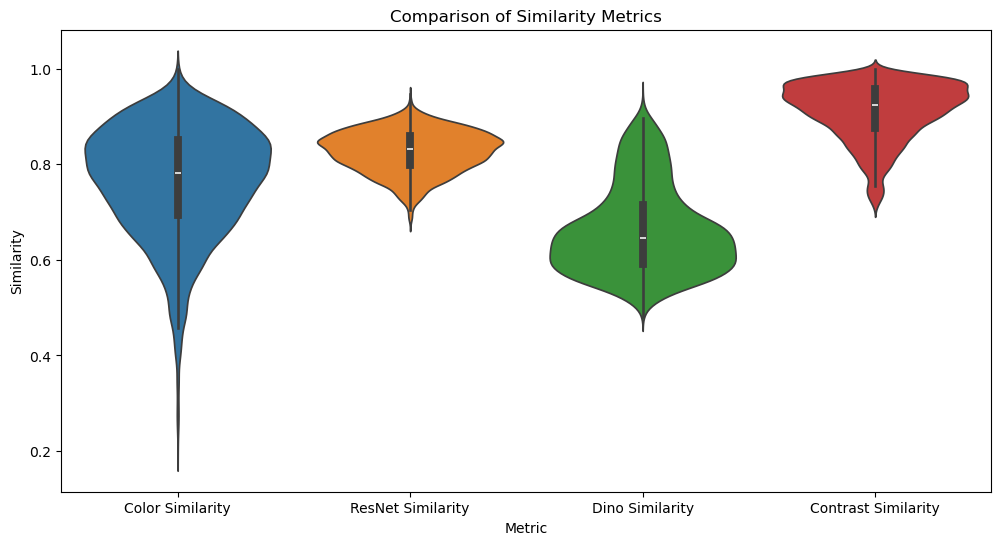

In [402]:
csv_files =[
    colors,
    resnets,
    dinos,
    contrasts
    ]
metrics = ["Color Similarity", "ResNet Similarity", "Dino Similarity", "Contrast Similarity"]

# Combine each metric into a single DataFrame with a new 'Metric' column
dfs = []
for csv_file, metric in zip(csv_files, metrics):
    df = csv_file.copy()
    df['Metric'] = metric  # Add a column for metric type
    dfs.append(df)

# Concatenate all DataFrames
all_data = pd.concat(dfs, ignore_index=True)

# Plot the violin plot with metric type as hue
#plt.figure(figsize=(7.5, 3*len(csv_files)))
plt.figure(figsize=(3*len(csv_files), 6))
sns.violinplot(data=all_data, x="Metric", y="Similarity", hue="Metric")
plt.title("Comparison of Similarity Metrics")
plt.ylabel("Similarity")
plt.xlabel("Metric")
plt.show()

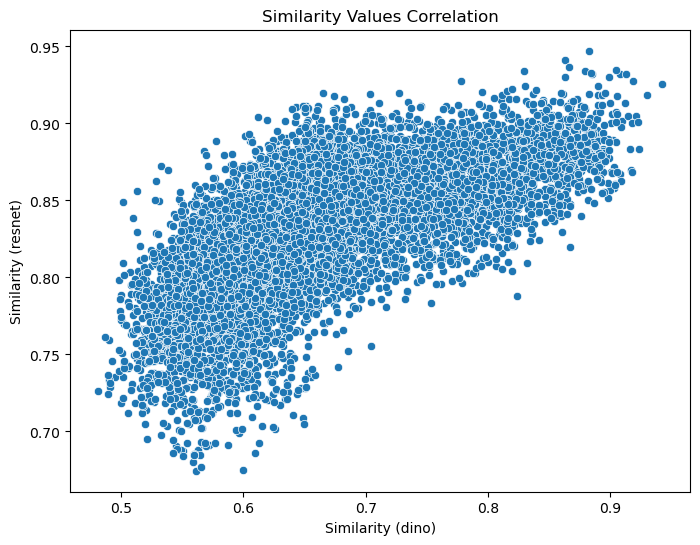

Correlation coefficient: 0.683775336690217


In [403]:
# Merge the two dataframes on 'Final_Submission' and 'Inspiration'
merged_df = pd.merge(dinos, resnets, on=['Final_Submission', 'Inspiration'], suffixes=('_df1', '_df2'))

# Plot the correlation using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='Similarity_df1', y='Similarity_df2')
plt.title('Similarity Values Correlation')
plt.xlabel('Similarity (dino)')
plt.ylabel('Similarity (resnet)')
plt.show()

# Compute and print the correlation coefficient
correlation = merged_df['Similarity_df1'].corr(merged_df['Similarity_df2'])
print(f'Correlation coefficient: {correlation}')

In [404]:
merge_all = pd.merge(
    pd.merge(
        colors,
        resnets,
        on=["Final_Submission", "Inspiration"],
        suffixes=("_colors", "_resnets")),
    pd.merge(
        dinos,
        contrasts,
        on=["Final_Submission", "Inspiration"],
        suffixes=("_dinos", "_contrasts")),
    on=["Final_Submission", "Inspiration"],
)
merge_all.columns = ["Final_Submission", "Inspiration", "Color_Similarity", "ResNet_Similarity", "Dino_Similarity","Contrast_Similarity"]
merge_all.head()

,Final_Submission,Inspiration,Color_Similarity,ResNet_Similarity,Dino_Similarity,Contrast_Similarity
0,1_1.png,1A_1.jpg,0.622241,0.892090,0.839069,0.925463
1,1_1.png,1A_10.jpg,0.886676,0.839423,0.751582,0.890714
2,1_1.png,1A_2.jpg,0.800207,0.842421,0.621365,0.965747
3,1_1.png,1A_3.jpg,0.775083,0.824793,0.638482,0.961536
4,1_1.png,1A_4.jpg,0.815200,0.852547,0.690484,0.945429


<Axes: >

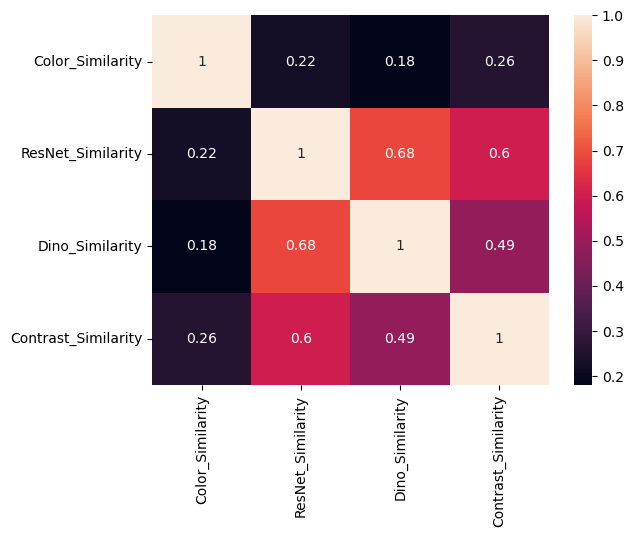

In [405]:
value_cols = ["Color_Similarity", "ResNet_Similarity", "Dino_Similarity", "Contrast_Similarity"]
sns.heatmap(merge_all[value_cols].corr(), annot=True)

## See bar plots of most simmilairty


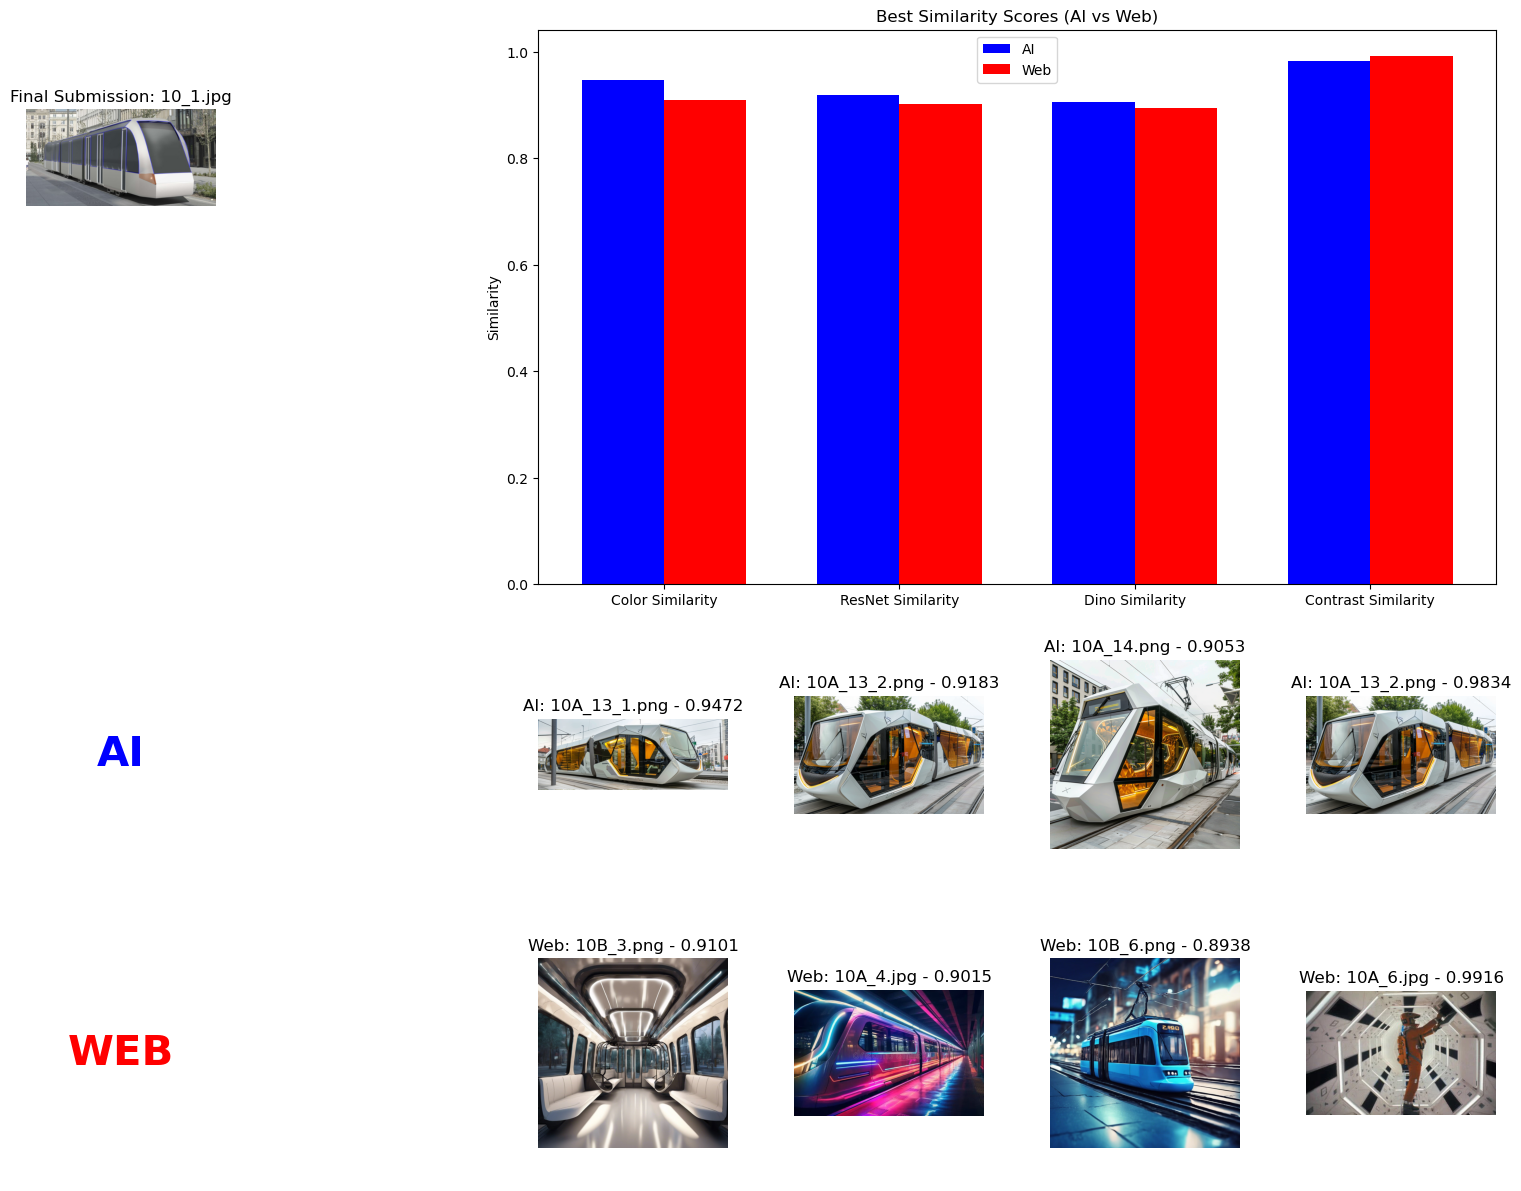

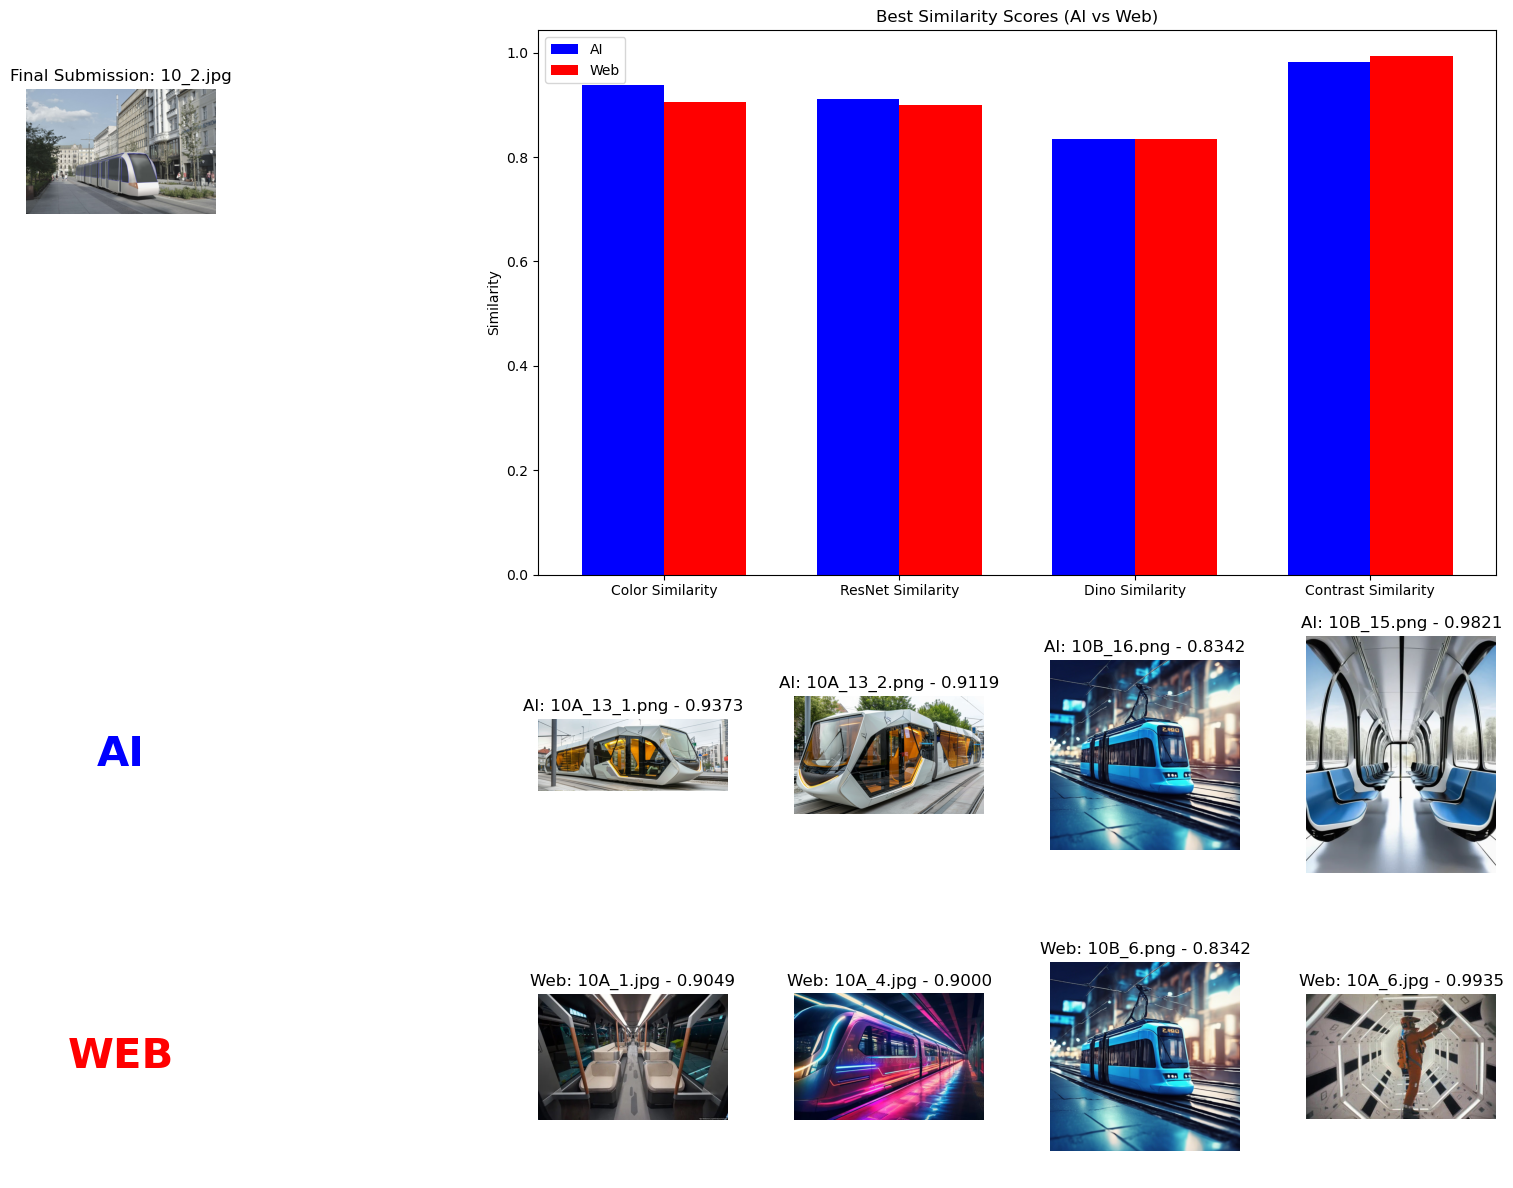

In [406]:
def show_simmilarity(group_id, csv_files):
    final_images, web_images, ai_images, final_srcs, web_srcs, ai_srcs = load_images(group_id)
    
    for i in range (len(final_srcs)):
        final_src = final_srcs[i]
        final_image=final_images[i]
        
        ai_sims=[] #color, resnet, dino
        ai_sims_srcs=[]
        
        web_sims=[]
        web_sims_srcs=[]
        
        for csv_file in csv_files:
            final_df = csv_file[csv_file['Final_Submission'] == final_src]
            
            web_df= final_df[final_df['Inspiration'].isin(web_srcs)]
            web_df= web_df.sort_values(by='Similarity', ascending=False)
            web_sims.append(web_df.iloc[0]['Similarity'])
            web_sims_srcs.append(web_df.iloc[0]['Inspiration'])
            
            ai_df= final_df[final_df['Inspiration'].isin(ai_srcs)]
            ai_df= ai_df.sort_values(by='Similarity', ascending=False)
            ai_sims.append(ai_df.iloc[0]['Similarity'])
            ai_sims_srcs.append(ai_df.iloc[0]['Inspiration'])
            
        
        fig = plt.figure(figsize=(15, 15))
        gs = GridSpec(5, 6, figure=fig)


        ax_final_submission = fig.add_subplot(gs[0:1, 0:1])  
        imshow_on_axis(final_image, ax_final_submission, f"Final Submission: {final_src}")
        
        ax = fig.add_subplot(gs[2, 0])  # ax for 3,0
        ax.text(0.5, 0.5, 'AI', fontsize=30, fontweight='bold', ha='center', va='center', color='blue')
        ax.axis('off')
        
        
        ax = fig.add_subplot(gs[3, 0])  # ax for 3,0
        ax.text(0.5, 0.5, 'WEB', fontsize=30, fontweight='bold', ha='center', va='center', color='red')
        ax.axis('off')
        
        for i in range(len(csv_files)):
            web_score = web_sims[i]
            web_image = web_images[web_srcs.index(web_sims_srcs[i])]
            
            ai_score = ai_sims[i]
            ai_image = ai_images[ai_srcs.index(ai_sims_srcs[i])]
            
            ax_web = fig.add_subplot(gs[3, i+2])
            imshow_on_axis(web_image, ax_web, f"Web: {web_sims_srcs[i]} - {web_score:.4f}")
            
            ax_ai = fig.add_subplot(gs[2, i+2])
            imshow_on_axis(ai_image, ax_ai, f"AI: {ai_sims_srcs[i]} - {ai_score:.4f}")
            
        
            
        ax_bar = fig.add_subplot(gs[0:2, 2:6])  
        bar_width = 0.35 
        x = np.arange(4)  


        ax_bar.bar(x - bar_width / 2, ai_sims, bar_width, label='AI', color='blue')
        ax_bar.bar(x + bar_width / 2, web_sims, bar_width, label='Web', color='red')


        ax_bar.set_ylabel("Similarity")
        ax_bar.set_title("Best Similarity Scores (AI vs Web)")
        ax_bar.set_xticks(x)
        ax_bar.set_xticklabels(['Color Similarity', 'ResNet Similarity', 'Dino Similarity', 'Contrast Similarity'])
        ax_bar.legend()

        plt.tight_layout()
        plt.show()
        
                
            
        
show_simmilarity(10, csv_files)    

# Is the inspiration conscious or subconscious?


In [407]:
def fix_name(name: str) -> str:
    name = name.strip().lower().split()
    name.sort()
    return ' '.join(name)

In [408]:
summary_survey = read_csv("data/Summary_Survey.csv")
summary_survey.columns = [c if c!="1. Imię i Nazwisko" else "Name" for c in summary_survey.columns ]
summary_survey["Name"] = summary_survey["Name"].apply(fix_name)
summary_survey.head()

,Sygnatura czasowa,Name,2. Nr grupy dziekańskiej,"3. Wybierz obrazek spośród wszystkich zgromadzonych inspiracji (1-20) i wskaż ten, który miał największe znaczenie dla osiągniętego efektu projektowego (finalnej koncepcji), z uwagi na aspekt EFEKTU ZASKOCZENIA:","4. Wybierz obrazek spośród wszystkich zgromadzonych inspiracji (1-20) i wskaż ten, który miał największe znaczenie dla osiągniętego efektu projektowego (finalnej koncepcji), z uwagi na aspekt INNOWACYJNOŚCI ROZWIĄZAŃ:","5. Wybierz obrazek spośród wszystkich zgromadzonych inspiracji (1-20) i wskaż ten, który miał największe znaczenie dla osiągniętego efektu projektowego (finalnej koncepcji), z uwagi na aspekt JAKOŚCI WIZUALNEJ:","6. Wybierz obrazek spośród wszystkich zgromadzonych inspiracji (1-20) i wskaż ten, który miał największe znaczenie dla osiągniętego efektu projektowego (finalnej koncepcji), z uwagi na aspekt NASTROJU SCENY:","7. Wybierz obrazek spośród wszystkich zgromadzonych inspiracji (1-20) i wskaż ten, który miał największe znaczenie dla osiągniętego efektu projektowego (finalnej koncepcji), z uwagi na aspekt KOLORYSTYKI:","8. Wybierz obrazek spośród wszystkich zgromadzonych inspiracji (1-20) i wskaż ten, który miał największe znaczenie dla osiągniętego efektu projektowego (finalnej koncepcji), z uwagi na aspekt ZESTAWIEŃ MATERIAŁOWYCH:","9. Wybierz obrazek spośród wszystkich zgromadzonych inspiracji (1-20) i wskaż ten, który miał największe znaczenie dla CAŁOKSZTAŁTU osiągniętego efektu projektowego (finalnej koncepcji).",10. Miejsce na dodatkowe komentarze/ uwagi:
0,2024/06/05 5:25:29 PM EEST,daria kachan,AWWA gr. 1.1 (II stopień),10,11,11,11,11,11,11,NaN
1,2024/06/05 5:47:56 PM EEST,domagalska magdalena,AWWA gr. 1.1 (II stopień),15,20,20,16,14,14,16,NaN
2,2024/06/05 5:48:16 PM EEST,bukowska daniela,AWWA gr. 1.1 (II stopień),17,12,12,16,19,12,17,NaN
3,2024/06/05 5:49:40 PM EEST,milena sielewicz,AWWA gr. 1.1 (II stopień),12,3,5,1,10,12,12,NaN
4,2024/06/05 5:51:23 PM EEST,iryna sidaruk,AWWA gr. 1.1 (II stopień),5,14,16,16,1,16,16,NaN


In [409]:
from utilities import get_participants

participants = get_participants()
participants["Name"] = participants["Name"].apply(fix_name)
participants.head()

,Name,ID,GroupID,WEB_inspirations,AI_inspirations,Final_submisions,Matrices,Comment
1,daria kachan,1A,1,"[data/web/1A_10.jpg, data/web/1A_8.jpg, data/w...","[data/ai/1A_11.png, data/ai/1A_12.png, data/ai...","[data/final_submissions/1/3.png, data/final_su...",M_1A,NaN
2,aleksandra skolimowska,1B,1,"[data/web/1B_5.JPG, data/web/1B_4.JPG, data/we...","[data/ai/1B_13_2.png, data/ai/1B_18_1.png, dat...","[data/final_submissions/1/3.png, data/final_su...",M_1B,NaN
3,iryna sidaruk,2A,2,"[data/web/2A_2.jpg, data/web/2A_1.jpg, data/we...","[data/ai/2A_15.png, data/ai/2A_14.png, data/ai...","[data/final_submissions/2/3.png, data/final_su...",M_2A,NaN
4,agnieszka musielska,2B,2,"[data/web/2B_4.jpg, data/web/2B_2.jpg, data/we...","[data/ai/2B_11.png, data/ai/2B_13.png, data/ai...","[data/final_submissions/2/3.png, data/final_su...",M_2B,NaN
5,domagalska magdalena,3A,3,"[data/web/3A_5.png, data/web/3A_3.png, data/we...","[data/ai/3A_20.png, data/ai/3A_12.png, data/ai...","[data/final_submissions/3/3.png, data/final_su...",M_3A,NaN


In [410]:
len([participant for participant in participants["Name"] if participant in summary_survey["Name"].values]), len(summary_survey)

(45, 49)

In [411]:
merged_participants = pd.merge(participants, summary_survey, on="Name",how="inner")

pick_column_match_text = lambda text: [c for c in merged_participants.columns if text.lower() in c.lower()][0]

merged_participants = merged_participants.drop(columns = [
    "Sygnatura czasowa",
    "2. Nr grupy dziekańskiej",
    "Comment","10. Miejsce na dodatkowe komentarze/ uwagi:",
    pick_column_match_text("EFEKTU ZASKOCZENIA"),
    pick_column_match_text("INNOWACYJNOŚCI ROZWIĄZAŃ"),
    pick_column_match_text("JAKOŚCI WIZUALNEJ"),
    pick_column_match_text("NASTROJU SCENY"),
    pick_column_match_text("ZESTAWIEŃ MATERIAŁOWYCH"),])

merged_participants.columns = ["Name",	"ID",	"GroupID",	"WEB_inspirations",	"AI_inspirations",	"Final_submisions",	"Matrices", "Assumed Top Color", "Assumed Top Overall"]
merged_participants.head()

,Name,ID,GroupID,WEB_inspirations,AI_inspirations,Final_submisions,Matrices,Assumed Top Color,Assumed Top Overall
0,daria kachan,1A,1,"[data/web/1A_10.jpg, data/web/1A_8.jpg, data/w...","[data/ai/1A_11.png, data/ai/1A_12.png, data/ai...","[data/final_submissions/1/3.png, data/final_su...",M_1A,11,11
1,aleksandra skolimowska,1B,1,"[data/web/1B_5.JPG, data/web/1B_4.JPG, data/we...","[data/ai/1B_13_2.png, data/ai/1B_18_1.png, dat...","[data/final_submissions/1/3.png, data/final_su...",M_1B,4,3
2,iryna sidaruk,2A,2,"[data/web/2A_2.jpg, data/web/2A_1.jpg, data/we...","[data/ai/2A_15.png, data/ai/2A_14.png, data/ai...","[data/final_submissions/2/3.png, data/final_su...",M_2A,1,16
3,agnieszka musielska,2B,2,"[data/web/2B_4.jpg, data/web/2B_2.jpg, data/we...","[data/ai/2B_11.png, data/ai/2B_13.png, data/ai...","[data/final_submissions/2/3.png, data/final_su...",M_2B,11,12
4,domagalska magdalena,3A,3,"[data/web/3A_5.png, data/web/3A_3.png, data/we...","[data/ai/3A_20.png, data/ai/3A_12.png, data/ai...","[data/final_submissions/3/3.png, data/final_su...",M_3A,14,16


In [ ]:
merged_participants["GroupID"].unique();


array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '27'], dtype=object)

In [413]:
merge_all["ID"] = merge_all["Inspiration"].apply(lambda x: (x.split("_")[0]))

In [414]:
def get_top_inspiration(participant_id,similarity_type,n=1):
    participant_images = merge_all[merge_all["ID"] == participant_id]
    mean_inspiration = participant_images.groupby("Inspiration")[similarity_type].median().reset_index()
    #print(mean_inspiration)
    insp = mean_inspiration.sort_values(by=similarity_type, ascending=False).head(n)
    insp["image_id"] = insp["Inspiration"].apply(lambda x: x.split("_")[1].split(".")[0])
    return insp

In [415]:
get_top_inspiration("27", "Dino_Similarity")

,Inspiration,Dino_Similarity,image_id
7,27_16.jpg,0.664589,16


In [ ]:
merged_participants["Calculated Top Color"] = merged_participants["ID"].apply(lambda x: get_top_inspiration(x, "Color_Similarity")["image_id"].values[0] if len(get_top_inspiration(x, "Color_Similarity"))>0 else None)
merged_participants["Calculated Top Overall"] = merged_participants["ID"].apply(lambda x: get_top_inspiration(x, "Dino_Similarity")["image_id"].values[0] if len(get_top_inspiration(x, "Dino_Similarity"))>0 else None)

merged_participants["Assumed Top Color Rank"] = merged_participants.apply(lambda row: get_top_inspiration(row["ID"],"Color_Similarity",n=10000)["image_id"].values.tolist().index(str(row["Assumed Top Color"]))+1 if str(row["Assumed Top Color"]) in get_top_inspiration(row["ID"],"Color_Similarity",n=10000)["image_id"].values.tolist() else None , axis=1) #loooooooooooooooooooooooooooooooooooooooooooooooooooooooooong line :)
merged_participants["Assumed Top Overall Rank"] = merged_participants.apply(lambda row: get_top_inspiration(row["ID"],"Dino_Similarity",n=10000)["image_id"].values.tolist().index(str(row["Assumed Top Overall"]))+1 if str(row["Assumed Top Overall"]) in get_top_inspiration(row["ID"],"Dino_Similarity",n=10000)["image_id"].values.tolist() else None , axis=1)

In [419]:
merged_participants

,Name,ID,GroupID,WEB_inspirations,AI_inspirations,Final_submisions,Matrices,Assumed Top Color,Assumed Top Overall,Calculated Top Color,Calculated Top Overall,Assumed Top Color Rank,Assumed Top Overall Rank
0,daria kachan,1A,1,"[data/web/1A_10.jpg, data/web/1A_8.jpg, data/w...","[data/ai/1A_11.png, data/ai/1A_12.png, data/ai...","[data/final_submissions/1/3.png, data/final_su...",M_1A,11,11,10,7,11.0,4.0
1,aleksandra skolimowska,1B,1,"[data/web/1B_5.JPG, data/web/1B_4.JPG, data/we...","[data/ai/1B_13_2.png, data/ai/1B_18_1.png, dat...","[data/final_submissions/1/3.png, data/final_su...",M_1B,4,3,1,12,6.0,29.0
2,iryna sidaruk,2A,2,"[data/web/2A_2.jpg, data/web/2A_1.jpg, data/we...","[data/ai/2A_15.png, data/ai/2A_14.png, data/ai...","[data/final_submissions/2/3.png, data/final_su...",M_2A,1,16,3,7,6.0,6.0
3,agnieszka musielska,2B,2,"[data/web/2B_4.jpg, data/web/2B_2.jpg, data/we...","[data/ai/2B_11.png, data/ai/2B_13.png, data/ai...","[data/final_submissions/2/3.png, data/final_su...",M_2B,11,12,11,5,1.0,7.0
4,domagalska magdalena,3A,3,"[data/web/3A_5.png, data/web/3A_3.png, data/we...","[data/ai/3A_20.png, data/ai/3A_12.png, data/ai...","[data/final_submissions/3/3.png, data/final_su...",M_3A,14,16,2,17,8.0,9.0
5,karolina prodlik,3B,3,"[data/web/3B_3.jpg, data/web/3B_6.jpg, data/we...","[data/ai/3B_17.png, data/ai/3B_19.png, data/ai...","[data/final_submissions/3/3.png, data/final_su...",M_3B,5,12,5,5,1.0,5.0
6,milena sielewicz,4A,4,"[data/web/4A_7.jpg, data/web/4A_4.jpg, data/we...","[data/ai/4A_15.png, data/ai/4A_12.png, data/ai...","[data/final_submissions/4/3.png, data/final_su...",M_4A,10,12,10,3,1.0,12.0
7,joanna zając,4B,4,"[data/web/4B_10.jpg, data/web/4B_4.jpg, data/w...","[data/ai/4B_12.png, data/ai/4B_19.png, data/ai...","[data/final_submissions/4/3.png, data/final_su...",M_4B,8,8,2,2,4.0,4.0
8,nela salwin,5A,5,"[data/web/5A_3.jpeg, data/web/5A_2.jpeg, data/...","[data/ai/5A_18.png, data/ai/5A_14.png, data/ai...","[data/final_submissions/5/3.png, data/final_su...",M_5A,1,1,4,11,2.0,16.0
9,konieczna oliwia,5B,5,"[data/web/5B_6.jpg, data/web/5B_3.jpg, data/we...","[data/ai/5B_15.png, data/ai/5B_13.png, data/ai...","[data/final_submissions/5/3.png, data/final_su...",M_5B,14,16,9,11,7.0,11.0
